# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Graphiques illustrant le recueil

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [23]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [24]:
recueil_filename = 'data/imports/221023-RecueilBrut.csv'

In [25]:
df_brut = pd.read_csv(recueil_filename)

In [26]:
df_brut

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,inversion de la preuve,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné)
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,non,non,...,non,non,non,non,NaN,NaN,FB,NaN,NaN,NaN
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,oui,non,...,non,oui,non,non,NaN,1.0,FB,NaN,NaN,NaN
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,non,non,...,non,non,non,non,non,NaN,FB,NaN,NaN,NaN
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,oui,non,...,non,non,non,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,oui,non,...,non,oui,oui,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,non,non,...,non,non,non,non,NaN,NaN,CN,NaN,NaN,NaN
496,39.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,oui,non,...,oui,oui,non,oui,NaN,1.0,FB,NaN,NaN,NaN
497,39.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",oui,non,...,non,non,oui,non,NaN,1.0,FB,NaN,NaN,NaN
498,39.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,oui,non,...,non,non,non,non,NaN,2.0,FB,NaN,NaN,NaN


### Mise en forme des données

In [27]:
import patat.imp.labels

In [28]:
df_recueil = df_brut.rename(columns = patat.imp.labels.label_translator)

In [29]:
import urllib
def get_site(url):
    if type(url)==str:
        return urllib.parse.urlsplit(url).netloc

df_recueil.loc[:,'site'] = df_recueil['url'].apply(get_site)

In [30]:
df_recueil.value_counts('site')

site
www.francesoir.fr                     114
www.breizh-info.com                    50
lesmoutonsrebelles.com                 41
www.wikistrike.com                     39
lezarceleurs.blogspot.com              32
lesdeqodeurs.fr                        23
lemediaen442.fr                        20
www.dreuz.info                         16
www.profession-gendarme.com            15
fr.sott.net                            14
www.mondialisation.ca                  13
www.polemia.com                        12
reseauinternational.net                11
www.nouvelordremondial.cc              10
www.lelibrepenseur.org                 10
www.lesalonbeige.fr                     9
www.voltairenet.org                     9
infodujour.fr                           5
lecourrier-du-soir.com                  5
www.les-crises.fr                       5
lesobservateurs.ch                      5
www.preuvesduparanormal.fr              5
lesakerfrancophone.fr                   5
www.cnews.fr                 

In [31]:
import numpy as np

def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [32]:
df_recueil=df_recueil.rename(columns=patat.imp.labels.label_translator)

In [33]:
df_recueil.keys()

Index(['# site', '# article', 'Site', 'url', 'Auteur/trice', 'Date', 'Titre',
       'Explication (pour les infox seulement)', 'infox', 'signe',
       'entites_nommees', 'entites_coherentes', 'ouverture_esprit',
       'qualite_ecriture', 'intention', 'faits', 'opinions', 'propos_raportes',
       'sources_citees', 'fausse_nouvelle', 'insinuations', 'exageration',
       'scientifique_sulfureux', 'trop_mots', 'trop_chiffres', 'sophisme',
       'inversion_preuve', 'inverifiable', 'titre_decale', 'denigrement',
       'cherry_picking', 'degre_infox', 'observateur', 'thème (abandonné)',
       'type infox (abandonné)', 'Date de collection (abandonné)', 'site'],
      dtype='object')

In [34]:
for label in patat.imp.labels.short_label_names:
    df_recueil[label]=df_recueil[label].apply(normalize_label)

#df_recueil = df_recueil.convert_dtypes()

for label in patat.imp.labels.short_label_names:
    print(label,df_recueil[label].isna().sum())

infox 1
signe 1
entites_nommees 0
entites_coherentes 0
ouverture_esprit 1
qualite_ecriture 2
faits 0
opinions 0
fausse_nouvelle 1
insinuations 2
exageration 261
scientifique_sulfureux 2
trop_mots 1
trop_chiffres 1
sophisme 1
inversion_preuve 1
inverifiable 1
propos_raportes 1
sources_citees 1
titre_decale 1
denigrement 351
cherry_picking 475


In [35]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,inverifiable,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,1.0,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com
496,39.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,1.0,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
497,39.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,0.0,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
498,39.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com


## Expérience
---

In [36]:
import matplotlib as plt
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

### Distribution sites

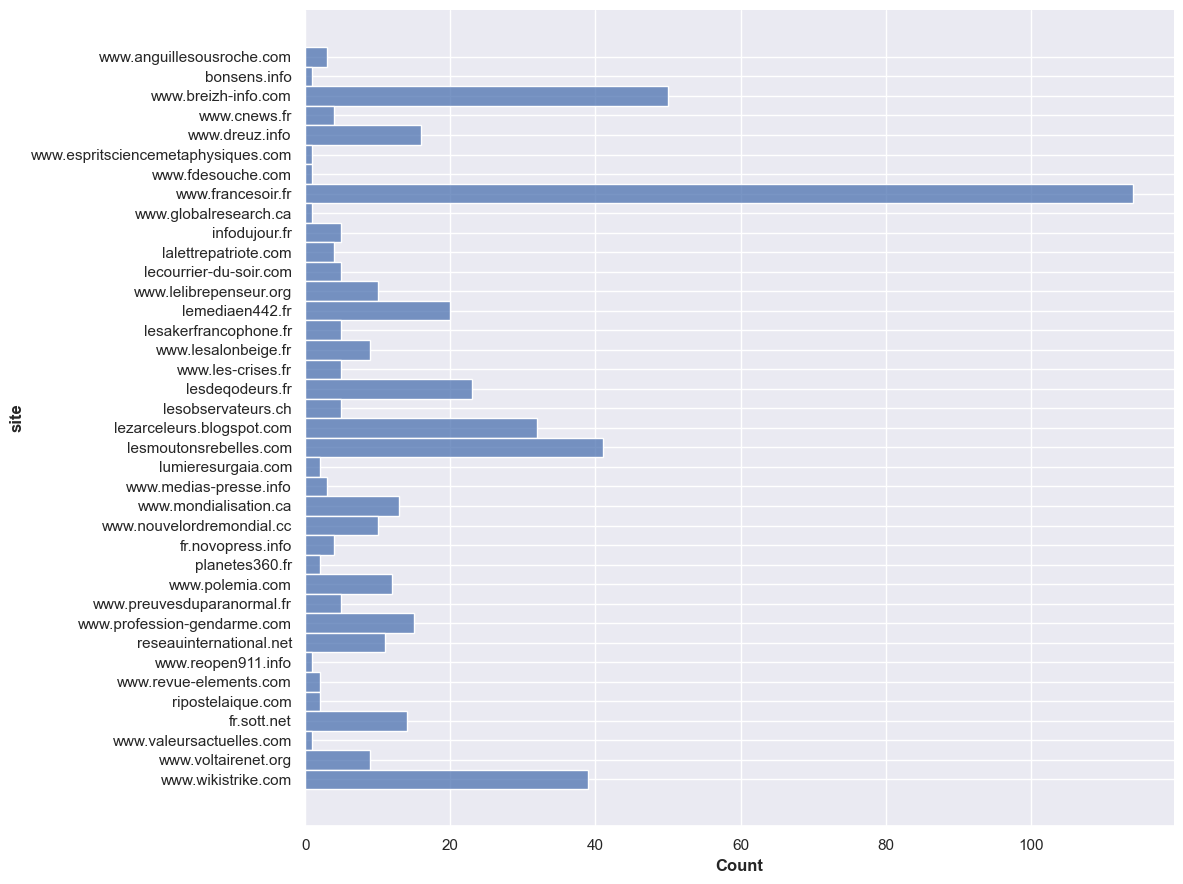

In [59]:
df_plot = df_recueil
sns.set_palette('deep')
#sns.set(rc={'figure.figsize':(4,3)})
plot = sns.displot(data=df_plot, y='site',height=9, aspect=4/3)

### infox / non infox

In [61]:
df_plot

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,inverifiable,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site
0,1.00,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
1,1.00,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.00,0.00,...,1.00,0.00,0.00,NaN,1.00,FB,NaN,NaN,NaN,www.anguillesousroche.com
2,1.00,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
3,2.00,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.00,0.00,...,0.00,0.00,NaN,NaN,1.00,FB,vaccin,pseudo science,27 avril 22,bonsens.info
4,3.00,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.00,0.00,...,1.00,1.00,NaN,NaN,2.00,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.00,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com
496,39.00,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.00,0.00,...,1.00,0.00,1.00,NaN,1.00,FB,NaN,NaN,NaN,www.wikistrike.com
497,39.00,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.00,0.00,...,0.00,1.00,0.00,NaN,1.00,FB,NaN,NaN,NaN,www.wikistrike.com
498,39.00,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.00,0.00,...,0.00,0.00,0.00,NaN,2.00,FB,NaN,NaN,NaN,www.wikistrike.com


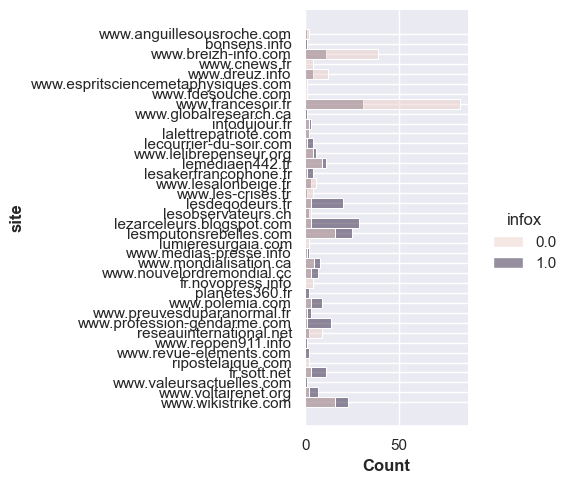

In [65]:
import matplotlib.pyplot as plt


label='infox'
#sns.set(rc={'figure.figsize':(4,3)})
plot = sns.displot(data=df_plot, y='site', hue=label)

In [41]:
df_plot.groupby(['site','infox']).sum()

# site  # article  signe  entites_nommees  \
site                     infox                                              
bonsens.info             1.0       2.0          4    0.0              1.0   
fr.novopress.info        0.0     104.0       1542    4.0              1.0   
fr.sott.net              0.0     108.0       1336    2.0              1.0   
                         1.0     396.0       4887    7.0              6.0   
infodujour.fr            0.0      20.0        387    1.0              0.0   
...                                ...        ...    ...              ...   
www.valeursactuelles.com 1.0      37.0        452    0.0              1.0   
www.voltairenet.org      0.0      76.0        920    1.0              1.0   
                         1.0     266.0       3193    4.0              5.0   
www.wikistrike.com       0.0     624.0       7629    0.0             10.0   
                         1.0     897.0      11130    3.0             15.0   

                                entites_coherentes  ouverture_esprit  \
site                     infox                                         
bonsens.info             1.0                   1.0               0.0   
fr.novopress.info        0.0                   1.0               1.0   
fr.sott.net              0.0                   1.0               0.0   
                         1.0                   6.0               0.0   
infodujour.fr            0.0                   0.0               0.0   
...                                            ...               ...   
www.valeursactuelles.com 1.0                   1.0               0.0   
www.voltairenet.org      0.0                   1.0               0.0   
                         1.0                   4.0               0.0   
www.wikistrike.com       0.0                   9.0               1.0   
                         1.0                  15.0               2.0   

                                qualite_ecriture  faits  opinions  \
site                     infox                                      
bonsens.info             1.0                 1.0    1.0       1.0   
fr.novopress.info        0.0                 4.0    2.0       4.0   
fr.sott.net              0.0                 3.0    1.0       1.0   
                         1.0                10.0    6.0       6.0   
infodujour.fr            0.0                 2.0    0.0       0.0   
...                                          ...    ...       ...   
www.valeursactuelles.com 1.0                 1.0    1.0       1.0   
www.voltairenet.org      0.0                 2.0    2.0       1.0   
                         1.0                 7.0    6.0       5.0   
www.wikistrike.com       0.0                16.0    9.0       1.0   
                         1.0                22.0   19.0      16.0   

                                propos_raportes  ...  scientifique_sulfureux  \
site                     infox                   ...                           
bonsens.info             1.0                1.0  ...                     1.0   
fr.novopress.info        0.0                0.0  ...                     0.0   
fr.sott.net              0.0                0.0  ...                     0.0   
                         1.0                6.0  ...                     1.0   
infodujour.fr            0.0                0.0  ...                     0.0   
...                                         ...  ...                     ...   
www.valeursactuelles.com 1.0                0.0  ...                     0.0   
www.voltairenet.org      0.0                1.0  ...                     0.0   
                         1.0                3.0  ...                     0.0   
www.wikistrike.com       0.0                1.0  ...                     0.0   
                         1.0               12.0  ...                     1.0   

                                trop_mots  trop_chiffres  sophisme  \
site                     infox                                       
bonsens.info  

In [42]:
sns.factorplot(data=df_plot, y='site', hue=label, kind='bar')

/Users/fm/Desktop/Work/Patat/patat-env/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: Vertical orientation requires numeric `y` variable.

In [43]:
df_recueil[patat.imp.labels.short_label_names].sum()

infox                     251.0
signe                     166.0
entites_nommees           270.0
entites_coherentes        263.0
ouverture_esprit           29.0
qualite_ecriture          488.0
faits                     291.0
opinions                  253.0
fausse_nouvelle            83.0
insinuations              220.0
exageration               117.0
scientifique_sulfureux     28.0
trop_mots                  46.0
trop_chiffres              20.0
sophisme                   27.0
inversion_preuve           52.0
inverifiable              107.0
propos_raportes           129.0
sources_citees            169.0
titre_decale               71.0
denigrement                19.0
cherry_picking              1.0
dtype: float64

In [44]:
df_plot = df_recueil.pivot_table(index='site',aggfunc='mean')[patat.imp.labels.short_label_names]
#df_plot = df_recueil.pivot_table(index='site',aggfunc='sum')[['infox','signe','faits','opinions']]
df_plot

,infox,signe,entites_nommees,entites_coherentes,ouverture_esprit,qualite_ecriture,faits,opinions,fausse_nouvelle,insinuations,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
site,,,,,,,,,,,,,,,,,,,,,
bonsens.info,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN
fr.novopress.info,0.000000,1.000000,0.250000,0.250000,0.250000,1.000000,0.500000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,NaN
fr.sott.net,0.785714,0.642857,0.500000,0.500000,0.000000,0.928571,0.500000,0.500000,0.214286,0.642857,...,0.142857,0.000000,0.071429,0.071429,0.214286,0.428571,0.428571,0.285714,0.000000,NaN
infodujour.fr,0.600000,0.600000,0.400000,0.400000,0.000000,1.000000,0.200000,0.200000,0.200000,0.400000,...,0.000000,0.000000,0.200000,0.000000,0.400000,0.400000,0.400000,0.000000,NaN,NaN
lalettrepatriote.com,0.500000,1.000000,0.750000,0.750000,0.000000,1.000000,0.750000,1.000000,0.000000,0.750000,...,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,0.750000,0.250000,NaN,NaN
lecourrier-du-soir.com,0.800000,1.000000,0.800000,0.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.600000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.400000,0.800000,0.800000,0.000000,0.0
lemediaen442.fr,0.550000,0.050000,0.750000,0.800000,0.100000,1.000000,0.850000,0.750000,0.200000,0.700000,...,0.000000,0.000000,0.000000,0.050000,0.050000,0.200000,0.550000,0.300000,0.300000,0.0
lesakerfrancophone.fr,0.800000,1.000000,1.000000,1.000000,0.000000,1.000000,0.400000,1.000000,0.200000,0.800000,...,0.000000,0.000000,0.000000,0.000000,0.800000,0.600000,0.400000,0.200000,0.750000,NaN
lesdeqodeurs.fr,0.869565,0.090909,0.391304,0.347826,0.000000,1.000000,0.478261,0.391304,0.173913,0.652174,...,0.434783,0.043478,0.043478,0.173913,0.347826,0.260870,0.304348,0.086957,0.142857,0.0


<AxesSubplot:ylabel='site'>

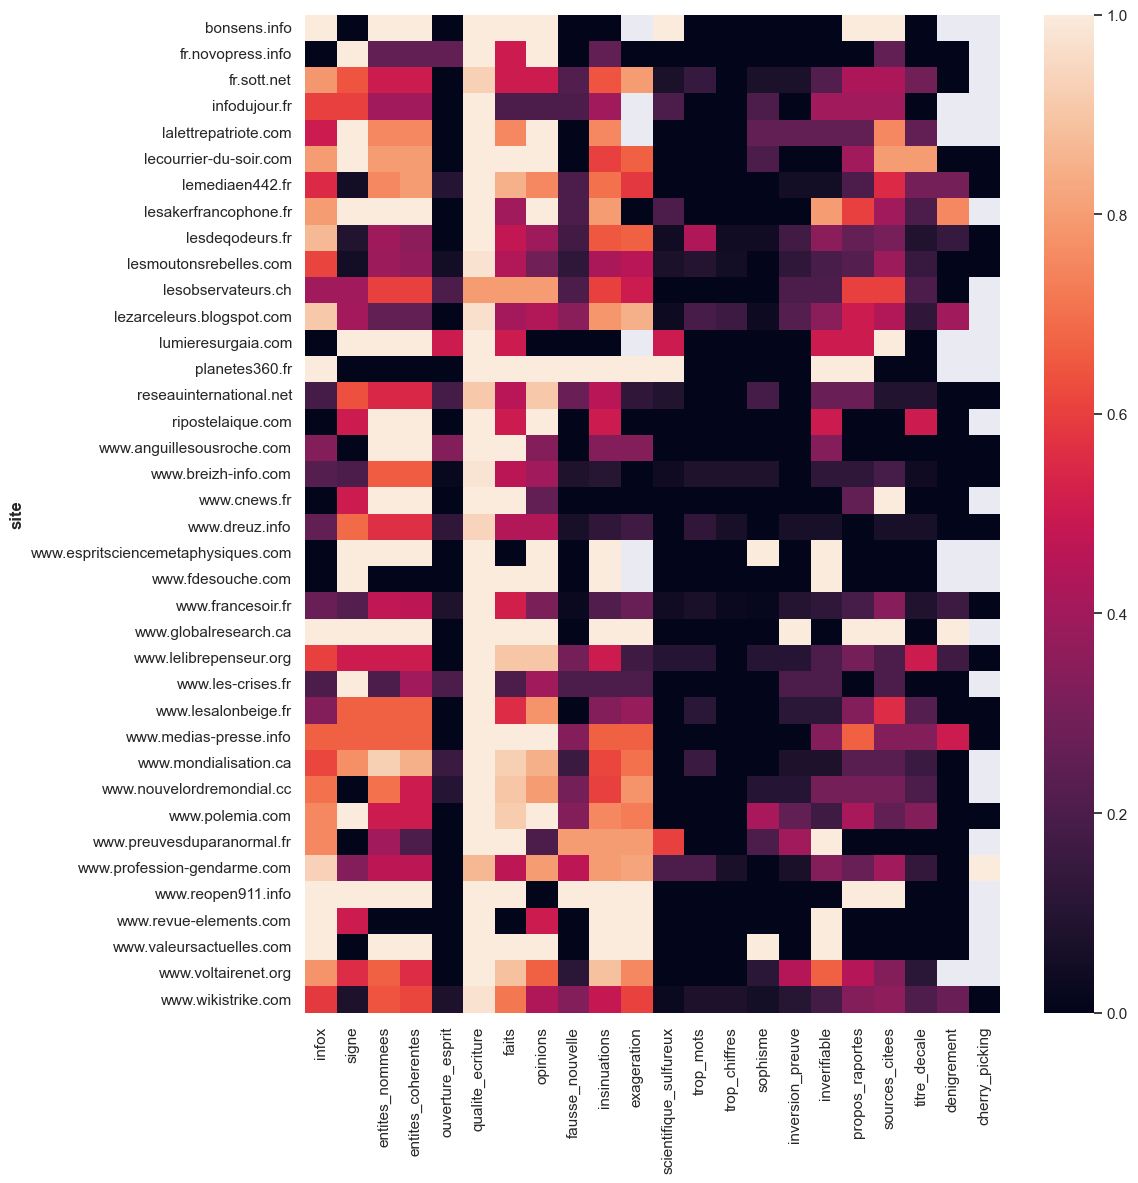

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=df_plot,vmax=1)

In [50]:
pd.options.display.float_format = '{:,.2f}'.format
df_plot = df_recueil[patat.imp.labels.short_label_names].pivot_table(columns='infox',aggfunc='sum')
#df_plot = df_recueil.pivot_table(index='site',aggfunc='sum')[['infox','signe','faits','opinions']]
#df_plot.drop(index=['# article','# site'])
df_plot = df_plot[[1.0,0.0]]
df_plot['ecart']=(df_plot[1]-df_plot[0])
df_plot['total']=df_plot[1]+df_plot[0]
df_plot['freq_1']=df_plot[1]/df_plot['total']
df_plot['freq_0']=df_plot[0]/df_plot['total']
df_plot['freq_e']=df_plot['ecart']/df_plot['total']
df_plot = df_plot.sort_values('ecart',ascending=False)
df_plot

infox,1.0,0.0,ecart,total,freq_1,freq_0,freq_e
insinuations,196.00,23.00,173.00,219.00,0.89,0.11,0.79
exageration,109.00,7.00,102.00,116.00,0.94,0.06,0.88
fausse_nouvelle,80.00,2.00,78.00,82.00,0.98,0.02,0.95
inverifiable,90.00,16.00,74.00,106.00,0.85,0.15,0.70
propos_raportes,101.00,28.00,73.00,129.00,0.78,0.22,0.57
sources_citees,118.00,51.00,67.00,169.00,0.70,0.30,0.40
titre_decale,60.00,11.00,49.00,71.00,0.85,0.15,0.69
opinions,148.00,104.00,44.00,252.00,0.59,0.41,0.17
inversion_preuve,47.00,4.00,43.00,51.00,0.92,0.08,0.84
trop_mots,43.00,3.00,40.00,46.00,0.93,0.07,0.87


<AxesSubplot:xlabel='1', ylabel='0'>

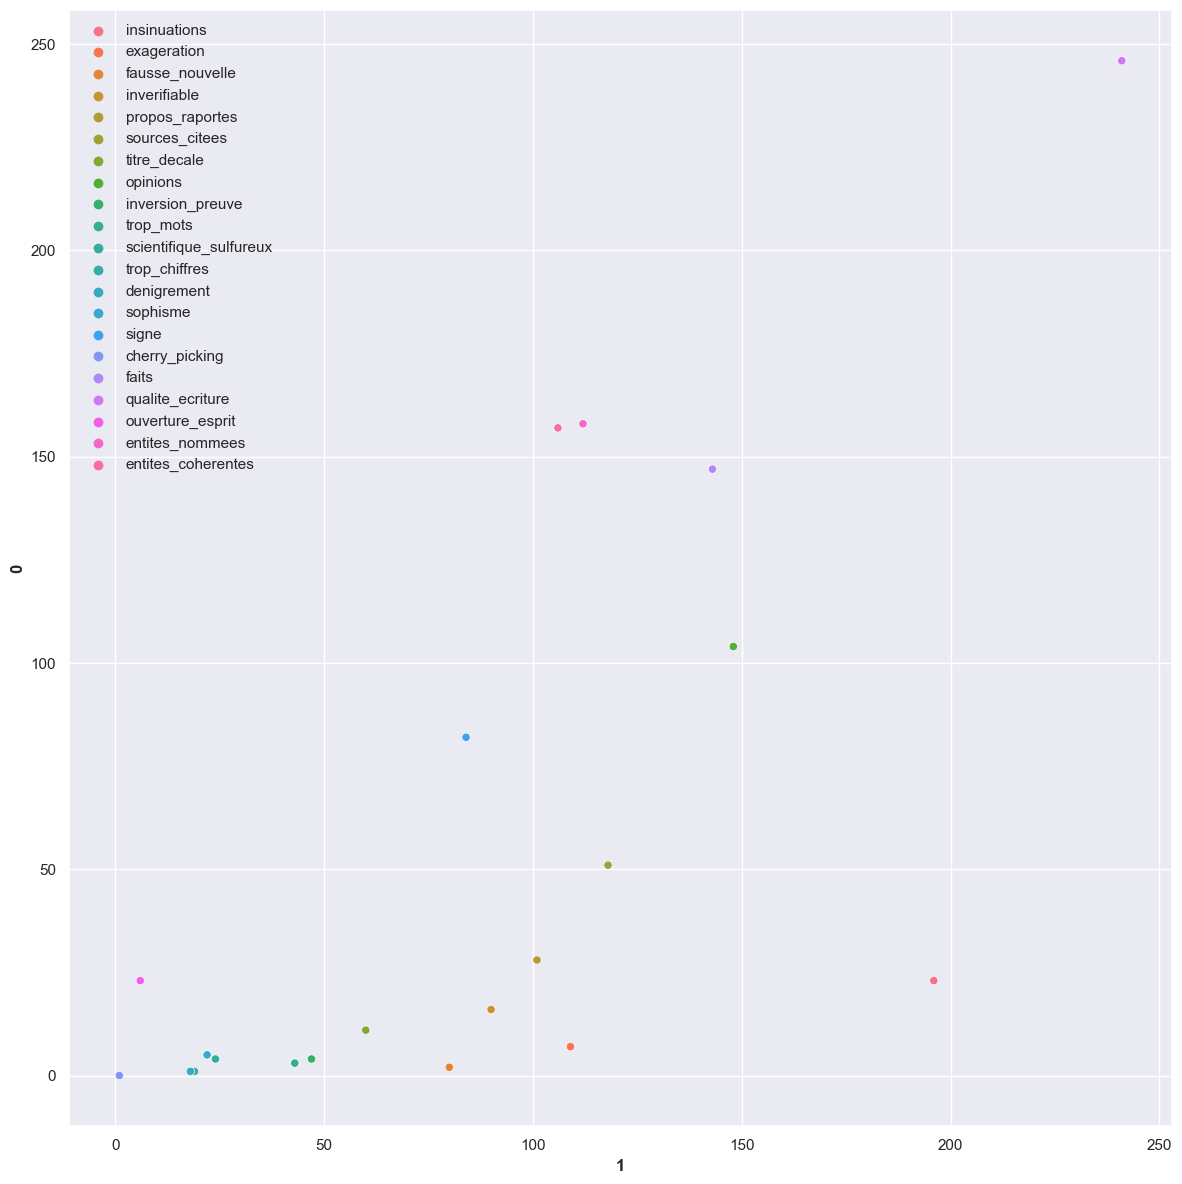

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=df_plot,x=1,y=0,hue=df_plot.index)

<AxesSubplot:xlabel='freq_e'>

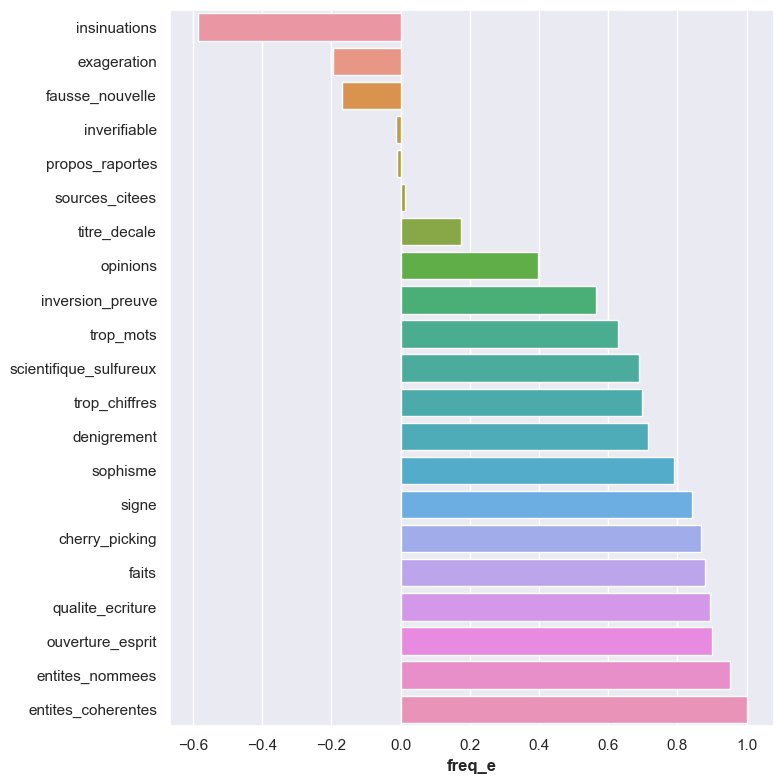

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_plot.sort_values('freq_e'),y=df_plot.index,x='freq_e')

<AxesSubplot:xlabel='freq_1'>

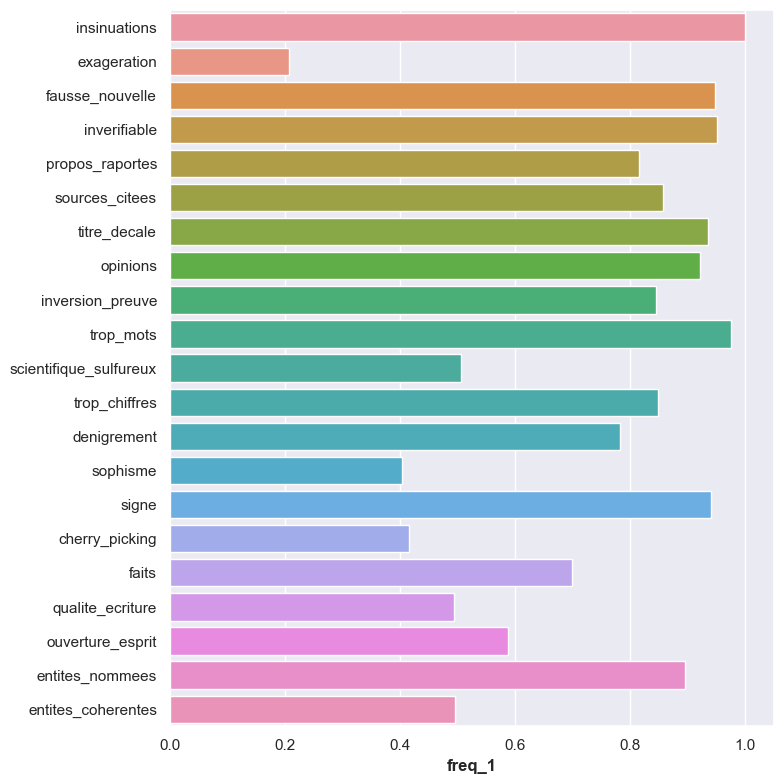

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_plot.sort_values(1.0),y=df_plot.index,x='freq_1')

## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [ ]:
!pip3 install --upgrade pip